In [ ]:
# ONE SIMULATION
import sys
import pandas as pd
import numpy as np
np.set_printoptions(threshold=sys.maxsize)

# Initialize number of students and days
students = 31        #as rows
days = 40           #as columns
array = np.zeros((students, days))

# Set the first entry (1st student) in the first column (day 0) to 1 (Tommy is the only infected)
array[0, 0:3] = 1    #Tommy is infectious for three days
array[0, 3:] = 2     #Tommy recovers after three days of being infectious

# Loop through every column/day
for col in range(days):

    # Check if there is at least one infected (1) in the current column/day
    if np.any(array[:, col] == 1):
        # Calculate the number of infected in the current column/day
        num_ones = np.sum(array[:, col] == 1)

        # Calculate the probability of becoming infected, based on the number of currently infected
        prob = 0.02 * num_ones

        # Loop through every row in the next column/day
        for row in range(students):
            if array[row, col] == 0: #if student is susceptible (zero)
                # Apply the probability of becoming infected
                if np.random.rand() <= prob:
                    # Turn the next three columns (next three days) into infectious (labeled as 1)
                    array[row, col + 1 : col + 4] = 1
                    # Set the remaining days to be recovered (labeled as 2)
                    array[row, col + 4 :] = 2
# Printing out array and Day # to visualize what's happening
    # print("Day " + str(col+1))
    # print(array)
# Create a dictionary to store the counts for each column
count_dict = {'infected': [], 'susceptible': [], 'recovered': []}

# Loop through every column
for col in range(days):
    # Count the occurrences of 1, 0, and 2 in the current column
    counts = np.bincount(array[:, col].astype(int), minlength=3)
    count_dict['infected'].append(counts[1])
    count_dict['susceptible'].append(counts[0])
    count_dict['recovered'].append(counts[2])

# Create the DataFrame from the count dictionary
df1 = pd.DataFrame(count_dict)

df1

,infected,susceptible,recovered
0,1,30,0
1,1,30,0
2,1,30,0
3,2,28,1
4,4,26,1
5,4,26,1
6,3,25,3
7,3,23,5
8,3,23,5
9,5,20,6


In [ ]:
# 1000 SIMULATIONS

import pandas as pd
import numpy as np

def run_simulations(students, days, num_simulations):
    results = []

    for _ in range(num_simulations):
        # Initialize the array for each simulation
        array = np.zeros((students, days))
        array[0, 0] = 1

        for col in range(days - 1):
            if np.any(array[:, col] == 1):
                num_ones = np.sum(array[:, col] == 1)
                prob = 0.02 * num_ones

                for row in range(students):
                    if array[row, col+1] == 0:
                        if np.random.rand() <= prob:

                            array[row, col+1] = 1
                            if col + 2 < days:
                                array[row, col + 2 : col + 5] = 1
                            if col + 5 < days:
                                array[row, col + 5 :] = 2

        count_dict = {'infected': [], 'susceptible': [], 'recovered': []}

        for col in range(days):
            counts = np.bincount(array[:, col].astype(int), minlength=3)
            count_dict['infected'].append(counts[1])
            count_dict['susceptible'].append(counts[0])
            count_dict['recovered'].append(counts[2])

        results.append(count_dict)

    # Calculate the average counts over all simulations
    avg_infected = np.mean([res['infected'] for res in results], axis=0)
    avg_susceptible = np.mean([res['susceptible'] for res in results], axis=0)
    avg_recovered = np.mean([res['recovered'] for res in results], axis=0)

    # Create a DataFrame to store the results
    df = pd.DataFrame({
        'Day': range(0, days),
        'Average Infected': avg_infected,
        'Average Susceptible': avg_susceptible,
        'Average Recovered': avg_recovered
    })

    return df

# Set the parameters for the simulation
students = 31
days = 40
num_simulations = 1000

# Run the simulations and get the DataFrame of average counts
average_counts_df = run_simulations(students, days, num_simulations)

# Print the resulting DataFrame
average_counts_df



,Day,Average Infected,Average Susceptible,Average Recovered
0,0,1.000,30.000,0.000
1,1,0.669,30.331,0.000
2,2,1.074,29.926,0.000
3,3,1.686,29.314,0.000
4,4,2.569,28.431,0.000
5,5,3.131,27.200,0.669
6,6,3.969,25.957,1.074
7,7,4.743,24.571,1.686
8,8,5.123,23.308,2.569
9,9,5.073,22.127,3.800


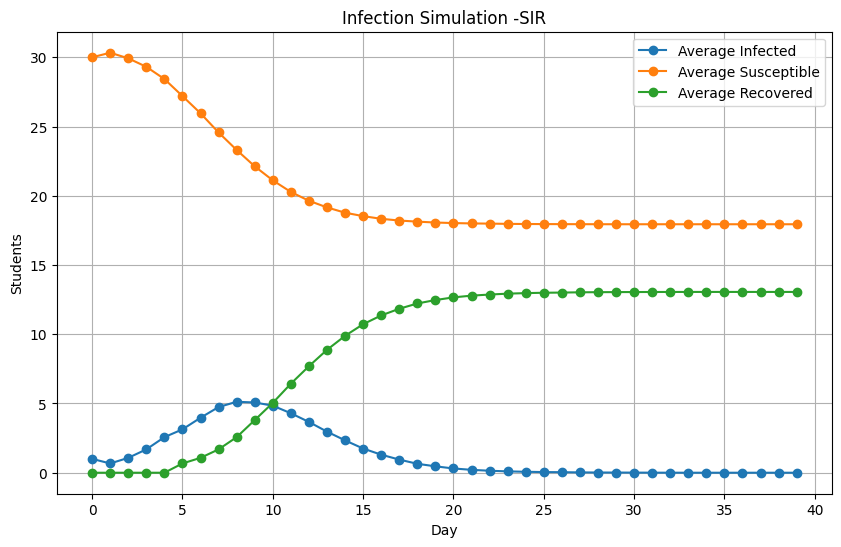

In [ ]:
#Histogram

import matplotlib.pyplot as plt

chartdf= average_counts_df

plt.figure(figsize=(10, 6))
plt.plot(chartdf['Day'], chartdf['Average Infected'], label='Average Infected', marker='o')
plt.plot(chartdf['Day'], chartdf['Average Susceptible'], label='Average Susceptible', marker='o')
plt.plot(chartdf['Day'], chartdf['Average Recovered'], label='Average Recovered', marker='o')

plt.xlabel('Day')
plt.ylabel('Students')
plt.title('Infection Simulation -SIR')
plt.legend()
plt.grid(True)
plt.show()

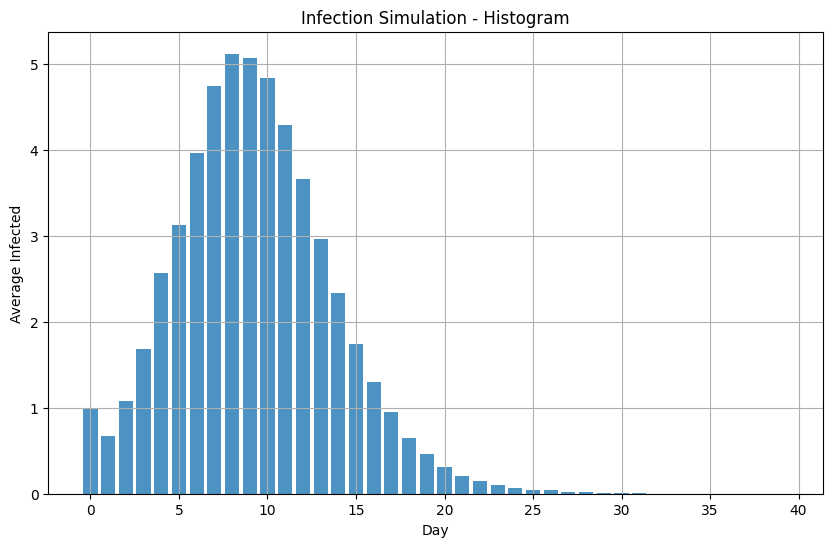

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(chartdf['Day'], chartdf['Average Infected'], align='center', alpha=0.8)

plt.xlabel('Day')
plt.ylabel('Average Infected')
plt.title('Infection Simulation - Histogram')
plt.grid(True)
plt.show()

Things to do:


*   Add a seed so the results are always the same
*   Run simulation with part e) 50/50 immunization





,Average Infected,Average Susceptible,Average Recovered
Day,,,
0,1.000,30.000,0.000
1,1.279,29.721,0.000
2,1.653,29.347,0.000
3,1.125,28.875,1.000
4,1.140,28.581,1.279
5,1.069,28.278,1.653
6,0.866,28.009,2.125
7,0.796,27.785,2.419
8,0.709,27.569,2.722


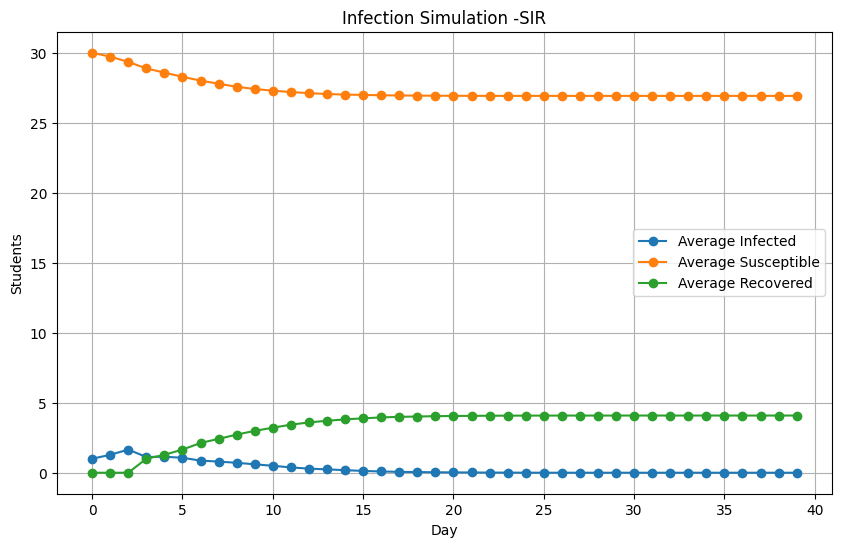

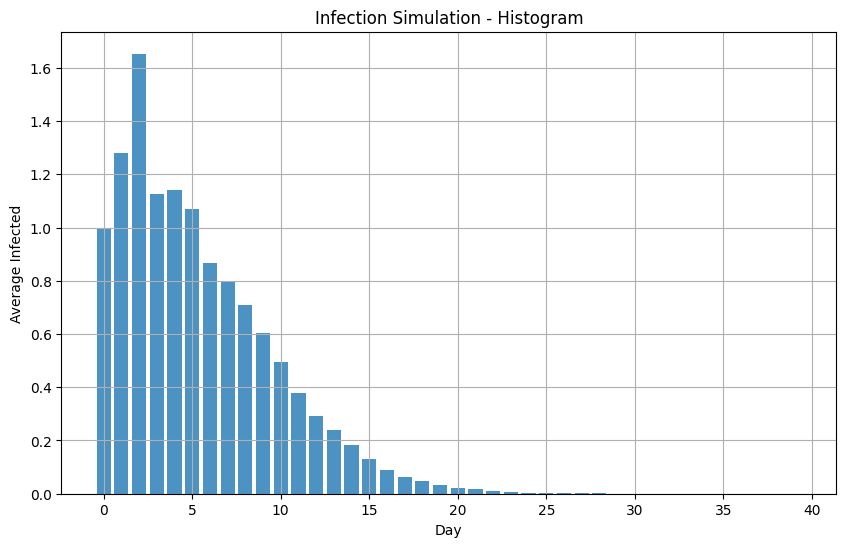

In [ ]:
# Part (e): 50/50 chance of being immunized - 1000 SIMULATIONS

import pandas as pd
import numpy as np

def run_simulations(students, days, num_simulations, prob):
    results = []

    for _ in range(num_simulations):
        # Initialize the array for each simulation
        array = np.zeros((students, days))
        # Create Tommy
        array[0, 0:3] = 1
        array[0, 3:] = 2

        for col in range(days):
            if np.any(array[:, col] == 1):
                num_ones = np.sum(array[:, col] == 1)  # collate number of infected kids on this day

                for row in range(students):
                    if (array[row, col] == 0) & (np.random.rand() <= 0.5): # If the student is susceptible AND the probability of being immunized:
                      for trial in range(num_ones): # running *num_ones* infection trials
                        if np.random.rand() <= prob:
                            array[row, col + 1 : col + 4] = 1
                            array[row, col + 4 :] = 2

        count_dict = {'infected': [], 'susceptible': [], 'recovered': []}

        for col in range(days):
            counts = np.bincount(array[:, col].astype(int), minlength=3)
            count_dict['infected'].append(counts[1])
            count_dict['susceptible'].append(counts[0])
            count_dict['recovered'].append(counts[2])

        results.append(count_dict)

    # Calculate the average counts over all simulations
    avg_infected = np.mean([res['infected'] for res in results], axis=0)
    avg_susceptible = np.mean([res['susceptible'] for res in results], axis=0)
    avg_recovered = np.mean([res['recovered'] for res in results], axis=0)

    # Create a DataFrame to store the results
    df = pd.DataFrame({
        'Day': range(0, days),
        'Average Infected': avg_infected,
        'Average Susceptible': avg_susceptible,
        'Average Recovered': avg_recovered
    })

    return df

# Set the parameters for the simulation
students = 31
days = 40
num_simulations = 1000
prob = 0.02

# Run the simulations and get the DataFrame of average counts
average_counts_df = run_simulations(students, days, num_simulations, prob)

# Print the resulting DataFrame
display(average_counts_df.set_index('Day'))

#Histogram

import matplotlib.pyplot as plt

chartdf= average_counts_df

plt.figure(figsize=(10, 6))
plt.plot(chartdf['Day'], chartdf['Average Infected'], label='Average Infected', marker='o')
plt.plot(chartdf['Day'], chartdf['Average Susceptible'], label='Average Susceptible', marker='o')
plt.plot(chartdf['Day'], chartdf['Average Recovered'], label='Average Recovered', marker='o')

plt.xlabel('Day')
plt.ylabel('Students')
plt.title('Infection Simulation -SIR')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.bar(chartdf['Day'], chartdf['Average Infected'], align='center', alpha=0.8)

plt.xlabel('Day')
plt.ylabel('Average Infected')
plt.title('Infection Simulation - Histogram')
plt.grid(True)
plt.show()


,Average Infected,Average Susceptible,Average Recovered
Day,,,
0,1.0000,30.0000,0.0000
1,2.2117,28.7883,0.0000
2,4.6245,26.3755,0.0000
3,7.8515,22.1485,1.0000
4,11.8639,16.9244,2.2117
5,14.6515,11.7240,4.6245
6,14.5518,7.5967,8.8515
7,11.9816,4.9428,14.0756
8,8.3320,3.3920,19.2760


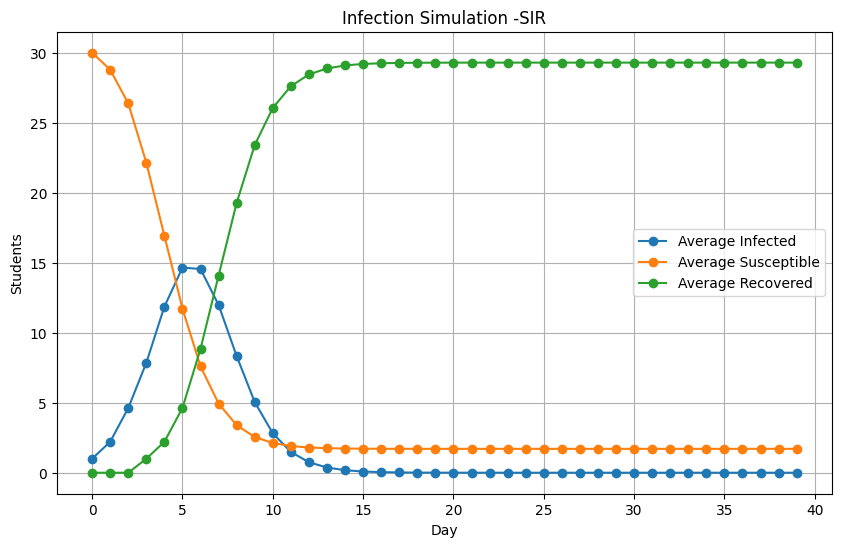

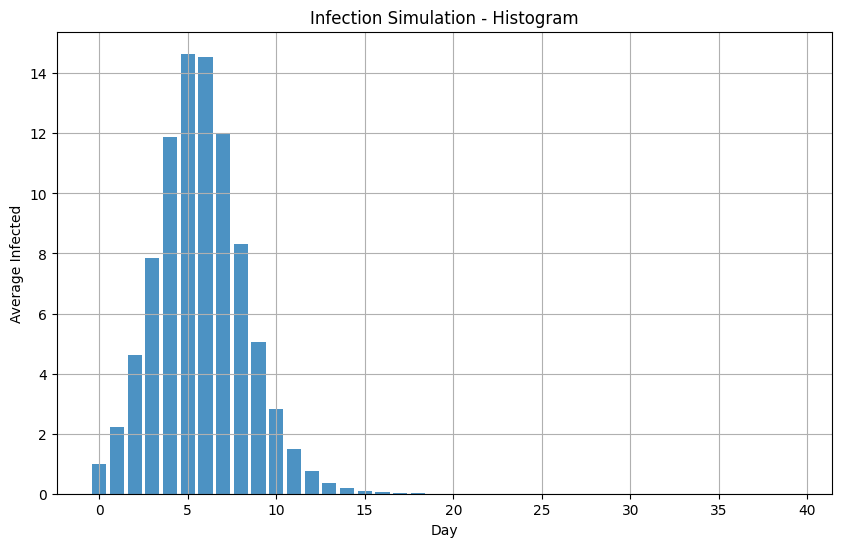

In [ ]:
# TESTING MODIFIED LOOP - DANIEL
# 10000 SIMULATIONS with individual infection trials

import pandas as pd
import numpy as np

def run_simulations(students, days, num_simulations, prob):
    results = []

    for _ in range(num_simulations):
        # Initialize the array for each simulation
        array = np.zeros((students, days))
        # Create Tommy
        array[0, 0:3] = 1
        array[0, 3:] = 2
        # count_dict = {'infected': [1], 'susceptible': [students-1], 'recovered': [0]}
        # daily_counts = {'I': 1, 'S': students-1, 'R': 0}

        for day in range(days):
            if np.any(array[:, day] == 1):
                num_ones = np.sum(array[:, day] == 1)  # collate number of infectious kids on this day

                for row in range(students):
                    if (array[row, day] == 0):
                      for trial in range(num_ones): # running *num_ones* infection trials
                        if np.random.rand() <= prob:
                            #array[row, col+1] = 1
                            #if col + 2 < days:
                            array[row, day + 1 : day + 4] = 1
                            #if col + 5 < days:
                            array[row, day + 4 :] = 2
            # # Now that all students have been iterated through and all interactions are finished for the current day
            # daily_counts['I'] = (array[:, day + 1] == 1).sum()
            # daily_counts['S'] -= 1
            # daily_counts['R'] = students - daily_counts['I'] - daily_counts['S']


        # Create a dictionary to store the counts for each column
        count_dict = {'infected': [], 'susceptible': [], 'recovered': []}

        for col in range(days):
            counts = np.bincount(array[:, col].astype(int), minlength=3)
            count_dict['infected'].append(counts[1])
            count_dict['susceptible'].append(counts[0])
            count_dict['recovered'].append(counts[2])

        results.append(count_dict)

    # Calculate the average counts over all simulations
    avg_infected = np.mean([res['infected'] for res in results], axis=0)
    avg_susceptible = np.mean([res['susceptible'] for res in results], axis=0)
    avg_recovered = np.mean([res['recovered'] for res in results], axis=0)

    # Create a DataFrame to store the results
    df = pd.DataFrame({
        'Day': range(0, days),
        'Average Infected': avg_infected,
        'Average Susceptible': avg_susceptible,
        'Average Recovered': avg_recovered
    })

    return df

# Set the parameters for the simulation
students = 31
days = 40
num_simulations = 10000
prob = 0.04 # Fixed probability of infection

# Run the simulations and get the DataFrame of average counts
average_counts_df = run_simulations(students, days, num_simulations, prob)

# Print the resulting DataFrame
display(average_counts_df.set_index('Day'))

#Histogram

import matplotlib.pyplot as plt

chartdf= average_counts_df

plt.figure(figsize=(10, 6))
plt.plot(chartdf['Day'], chartdf['Average Infected'], label='Average Infected', marker='o')
plt.plot(chartdf['Day'], chartdf['Average Susceptible'], label='Average Susceptible', marker='o')
plt.plot(chartdf['Day'], chartdf['Average Recovered'], label='Average Recovered', marker='o')

plt.xlabel('Day')
plt.ylabel('Students')
plt.title('Infection Simulation -SIR')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.bar(chartdf['Day'], chartdf['Average Infected'], align='center', alpha=0.8)

plt.xlabel('Day')
plt.ylabel('Average Infected')
plt.title('Infection Simulation - Histogram')
plt.grid(True)
plt.show()